<font size="5"><p style="text-align: center;">**Visualisation avec Seaborn**</font></p> 

<font size="4">**SEABORN , qu'est ce c'est?**</font>

Seaborn est une bibliothèque permettant de créer des graphiques en Python. Elle est basée sur Matplotlib, et s’intègre avec les structures Pandas.

<font size="3"> **Avantages:**</font>
- Syntaxe Facile et réduite
- Fournit différents styles et palettes de couleur attrayantes par défaut
- Seaborn automatise la création de figures multiples
- Intégration renforcée avec Pandas et ses Data Frames


On utilise principalement Matplotlib pour les tracés de graphiques basiques. Cependant, Matplotlib offre une flexibilité importante en termes de customisation et des performances parfois supérieures.

Choix de couleur: http://seaborn.pydata.org/tutorial/color_palettes.html

Choix du style : http://seaborn.pydata.org/tutorial/aesthetics.html


In [63]:
# Imporatation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Création d'un dataframe
df=pd.DataFrame(np.random.rand(50,1)*100, columns=['vitesse'])
df['poids']=np.random.rand(50,1)*100
df['Nbre_accident']=np.random.randint(10, size=50)
df['category']=np.random.choice(['Ford','BMW', 'Honda','Toyota'], size=50)
df['color']=np.random.choice(['Bleu','Rouge', 'Noir'], size=50)
df['bool']=np.random.choice([1,2], size=50)
df.head()

,vitesse,poids,Nbre_accident,category,color,bool
0,75.284504,70.752537,4,Ford,Noir,2
1,6.421015,59.474156,1,Ford,Rouge,2
2,68.826706,31.264555,0,Toyota,Rouge,1
3,70.060727,5.560702,2,BMW,Bleu,2
4,96.531337,71.857854,8,Toyota,Rouge,2


# CATPLOT - Variables catégorielles


seaborn.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7fecadf1cee0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

    Kind : bar - count - box - swarm - violin

https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot

<Figure size 864x504 with 0 Axes>

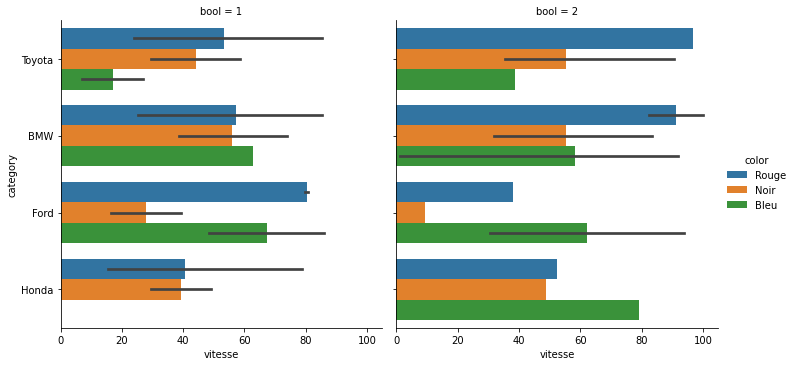

In [3]:
plt.figure(figsize=(12,7))
sns.catplot(y="category", x="vitesse",
                hue="color",
                col="bool",
                data=df, 
                kind="bar",
               )
plt.show()

## Barplot

seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)

    x,y,hue : names of variable in data or vector data
    data : DataFrame,array or list of array,optional
    color :matplotlib color,optional
    palette : palette name,list, or dict,optional

   
 https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot

### Exemple 1

In [66]:
df['category'].value_counts()

Ford      14
Honda     13
Toyota    12
BMW       11
Name: category, dtype: int64

Text(0.5, 1.0, 'Bar Plot')

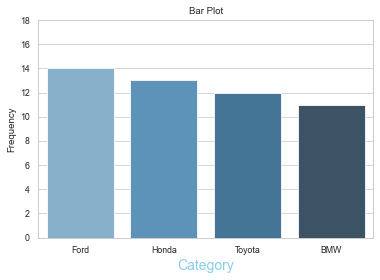

In [67]:
sns.barplot(x=df['category'].value_counts().index,
               y=df['category'].value_counts().values,
               palette="Blues_d")
z=list(range(0,20,2))
plt.yticks(z)
plt.xlabel('Category',fontsize=14, color="skyblue")
plt.ylabel('Frequency')
plt.title('Bar Plot')

<AxesSubplot:xlabel='category', ylabel='count'>

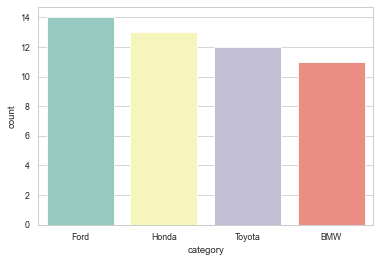

In [79]:
sns.countplot(x=df['category'], 
              order=df['category'].value_counts().index)

### Exemple 2: choix du style

    style: darkgrid, whitegrid, dark, white, ticks
    
    context: paper, talk, poster
    
    color_palette: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

Text(0.5, 1.0, 'Bar Plot')

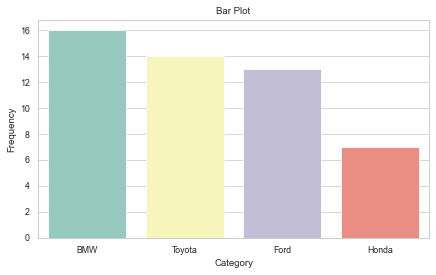

In [53]:
plt.figure(figsize=(7,4))

sns.set(style='whitegrid')
sns.set_context("paper")
sns.set_palette("Set3")

ax=sns.barplot(x=df['category'].value_counts().index,
               y=df['category'].value_counts().values)

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Plot')

Text(0.5, 1.0, 'Bar Plot')

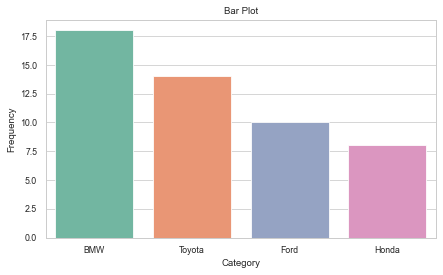

In [6]:
plt.figure(figsize=(7,4))

sns.set(style='whitegrid')
sns.set_context("paper")
sns.set_palette("Set2")

ax=sns.barplot(x=df['category'].value_counts().index,
               y=df['category'].value_counts().values)

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Plot')


### Exemple 3: Rotation de l'axe X 


In [7]:
df.groupby(['category', 'color'])["vitesse"].mean()

category  color
BMW       Bleu     59.465358
          Noir     55.557373
          Rouge    68.575729
Ford      Bleu     64.720662
          Noir     21.671031
          Rouge    66.186927
Honda     Bleu     79.150851
          Noir     42.566121
          Rouge    43.644772
Toyota    Bleu     21.337053
          Noir     50.767763
          Rouge    64.108284
Name: vitesse, dtype: float64

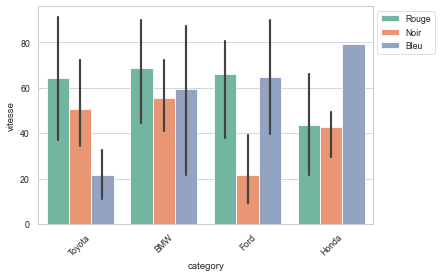

In [8]:
# Automatiquement la moyenne de vitesse avec ic de 95 par defaut (-> ci=0)
sns.barplot(x = "category", y = "vitesse", hue = "color", data = df) 
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1,1))

## Countplot

Compte les observations de chaque catégorie

seaborn.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)

https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot

### Exemple 1

<AxesSubplot:xlabel='category', ylabel='count'>

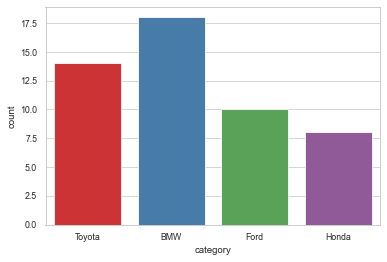

In [9]:
# // = exemple 1 du bar plot
sns.countplot(x="category", data=df, palette="Set1")

<AxesSubplot:xlabel='category', ylabel='count'>

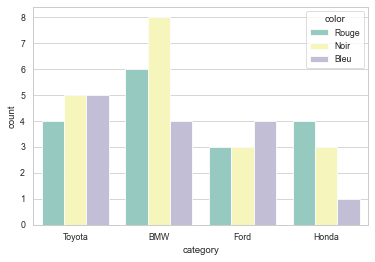

In [10]:
sns.countplot(x="category", hue="color", palette="Set3", data=df)

## Point PLot

seaborn.pointplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7fecadf1cee0>, ci=95, n_boot=1000, units=None, seed=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)

http://seaborn.pydata.org/generated/seaborn.pointplot.html?highlight=pointplot#seaborn.pointplot

### Exemple 1

/Users/blanchardnicolas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/categorical.py:1784: UserWarning: You passed a edgecolor/edgecolors ((0.9882352941176471, 0.5529411764705883, 0.3843137254901961)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=z)


<AxesSubplot:xlabel='category', ylabel='vitesse'>

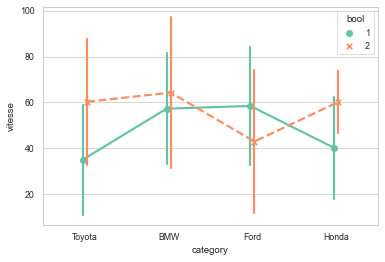

In [11]:
sns.pointplot(x="category", y="vitesse", hue="bool",
                   data=df,  
              dodge=True # permet de séparer les point 
              ,markers=["o", "x"]
              ,linestyles=["-", "--"]
             ,ci="sd")

## Boxplot

seaborn.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

### Exemple 1: une variable quantitative

<AxesSubplot:ylabel='vitesse'>

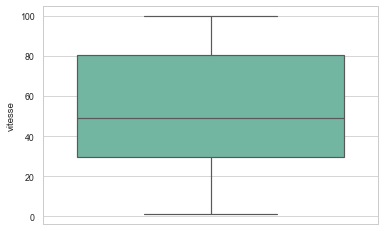

In [12]:
sns.boxplot(y=df['vitesse'])
# ,orient='h'

### Exemple 2: 

<AxesSubplot:xlabel='color', ylabel='vitesse'>

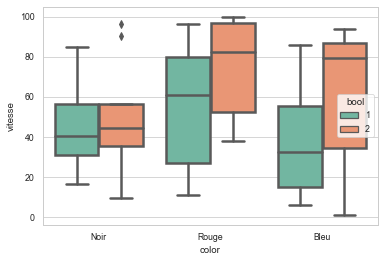

In [13]:
sns.boxplot(x=df['color'],y=df['vitesse']
           ,hue=df["bool"]
           ,linewidth=2.5 # épaisseur des bordures
           ,order=["Noir", "Rouge", "Bleu"] # ordre d'affichage 
           )


## SWARMPLOT

Une sorte de scatterplot catégoriel

seaborn.swarmplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)

http://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot

### Exemple 1

<AxesSubplot:xlabel='category', ylabel='vitesse'>

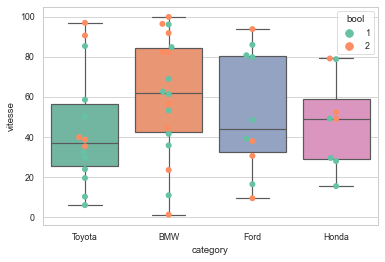

In [14]:
sns.boxplot(x="category", y="vitesse", data=df)
sns.swarmplot(x="category", y="vitesse", data=df
              ,hue="bool"
              ,size=6
             )

## Violinplot

Combinaition Boxplot et KDE (kernel density estimate)

seaborn.violinplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)

http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

### Exemple 1

<AxesSubplot:xlabel='category', ylabel='vitesse'>

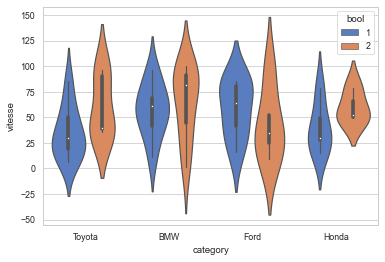

In [15]:
sns.violinplot(x="category", y="vitesse", hue="bool",
               data=df
               , palette="muted"
               #, split=True # compare les deux variable avec hue 
              )

# DISPLOT - Distributions

seaborn.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)

    kind: par défaut histogramme - kde - ecdf

https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot

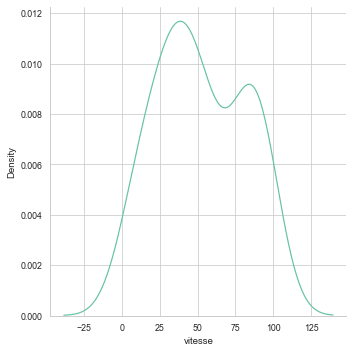

In [16]:
sns.displot(df, x="vitesse", kind="kde")

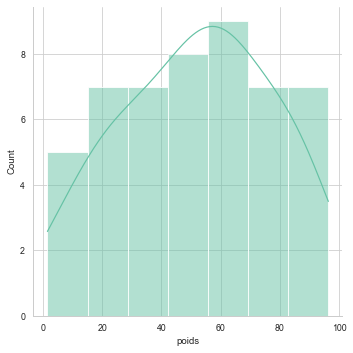

In [17]:
sns.displot(df, x="poids", kde=True)

## Histplot

Histogramme de variable uni-ou bivariées.

seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)

http://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

### Exemple 1

<AxesSubplot:xlabel='vitesse', ylabel='Count'>

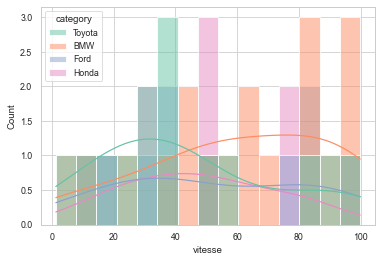

In [18]:
sns.histplot(data=df, x="vitesse"
            #,binwidth=3 # lg des bins
            ,bins=15 # nbre total de bins
            ,kde=True # ajout kde
            ,hue="category"
            #, multiple="stack" # emplilé
            #,log_scale=True # echelle log x
            #, fill=False # remplissage des barre
            )

## Kdeplot

seaborn.kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, **kwargs)

http://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kde#seaborn.kdeplot

### Exemple 1

<AxesSubplot:xlabel='vitesse', ylabel='Density'>

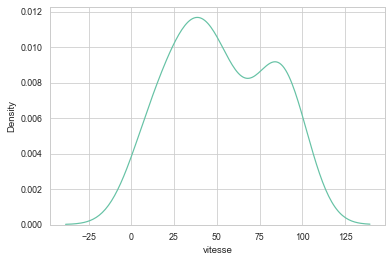

In [19]:
sns.kdeplot(data=df, x="vitesse"
           #, shade=True # remplir
        #, vertical=True
           )

### Exemple 2

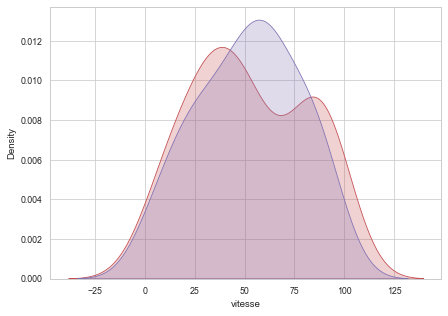

In [20]:
f, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(df['vitesse'], shade=True, color='r')
sns.kdeplot(df['poids'], shade=True, color='m')
plt.show()

## Rugplot

S'utilise souvent en association avec un autre type de graphique.

seaborn.rugplot(x=None, *, height=0.025, axis=None, ax=None, data=None, y=None, hue=None, palette=None, hue_order=None, hue_norm=None, expand_margins=True, legend=True, a=None, **kwargs)

http://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot

### Exemple 1

<AxesSubplot:xlabel='vitesse', ylabel='Density'>

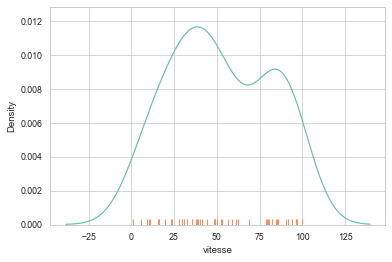

In [21]:
sns.kdeplot(data=df, x="vitesse")
sns.rugplot(data=df, x="vitesse")

## Densité plot
### Exemple 1

<AxesSubplot:xlabel='vitesse', ylabel='poids'>

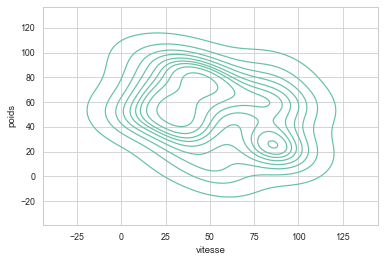

In [22]:
sns.kdeplot(x=df['vitesse'], y=df['poids'])

### Exemple 2

<AxesSubplot:xlabel='vitesse', ylabel='poids'>

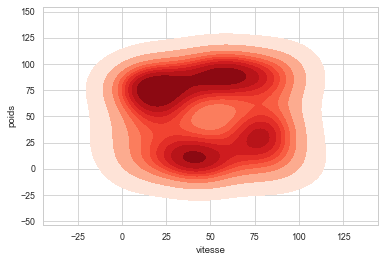

In [62]:
sns.kdeplot(x=df['vitesse'], y=df['poids'], cmap="Reds", shade=True)

<AxesSubplot:xlabel='vitesse', ylabel='poids'>

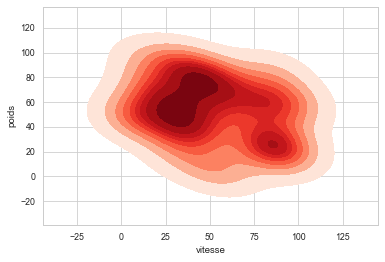

In [23]:
sns.kdeplot(x=df['vitesse'], y=df['poids'], cmap="Reds", shade=True)

# RELPLOT - Relation

kind: scatter - line

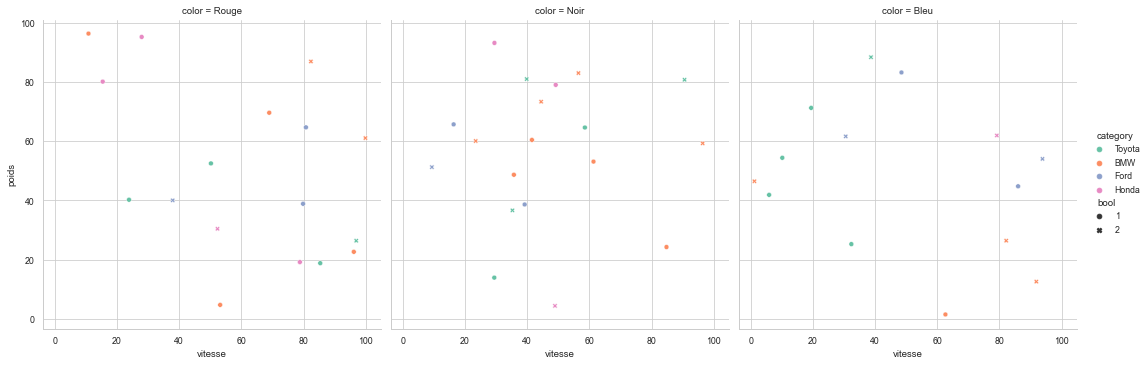

In [24]:
sns.relplot(
    data=df, x="vitesse", y="poids",
    col="color", hue="category", style="bool",
    kind="scatter"
)

## Scatterplot

### Exemple 1

<AxesSubplot:xlabel='vitesse', ylabel='poids'>

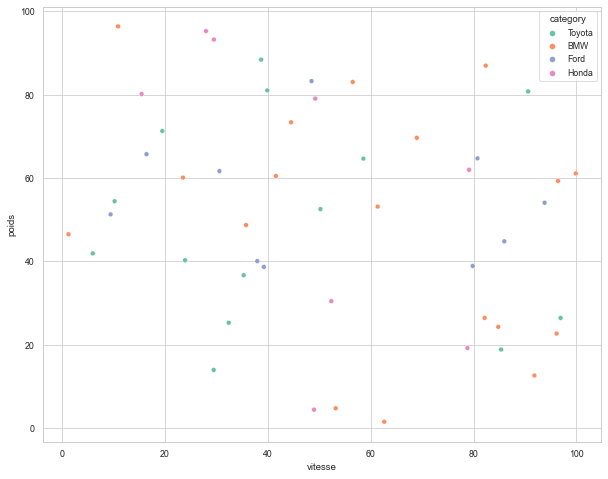

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="vitesse", y="poids"
               , hue="category"
                #, style="time"
               )


## Lineplot

seaborn.lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)

http://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot

### Exemple 1

In [26]:
sns.lineplot(data=df, x="year", y="")

ValueError: Could not interpret value `year` for parameter `x`

# REGPLOT - Regression

Affiche par défaut regression fit

seaborn.regplot(*, x=None, y=None, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)

http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot


<AxesSubplot:xlabel='vitesse', ylabel='poids'>

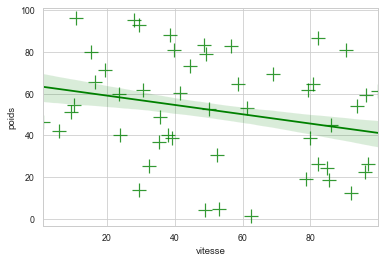

In [27]:
sns.regplot(x='vitesse', y='poids', data=df
           ,ci=68 # 68% confidence interval
            ,color='green', marker='+', scatter_kws={'s': 200}
           )

## Lmplot

seaborn.lmplot(*, x=None, y=None, data=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)

https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot

### Exemple 1

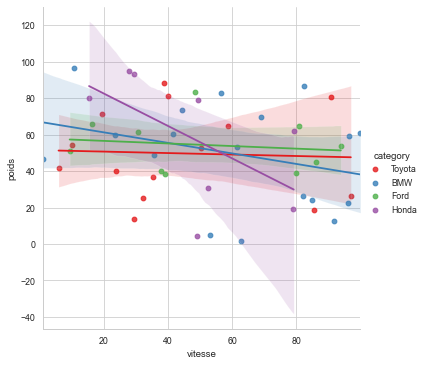

In [28]:
sns.lmplot(x='vitesse', y='poids', hue="category", data=df, palette="Set1")

### Exemple 2

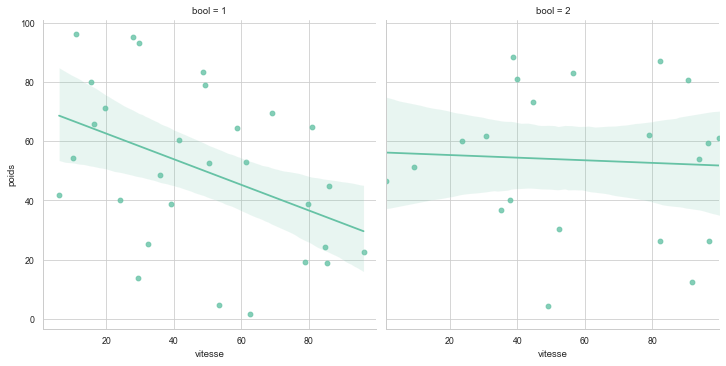

In [29]:
sns.lmplot(x='vitesse', y='poids', col="bool", data=df)

### Exemple 3

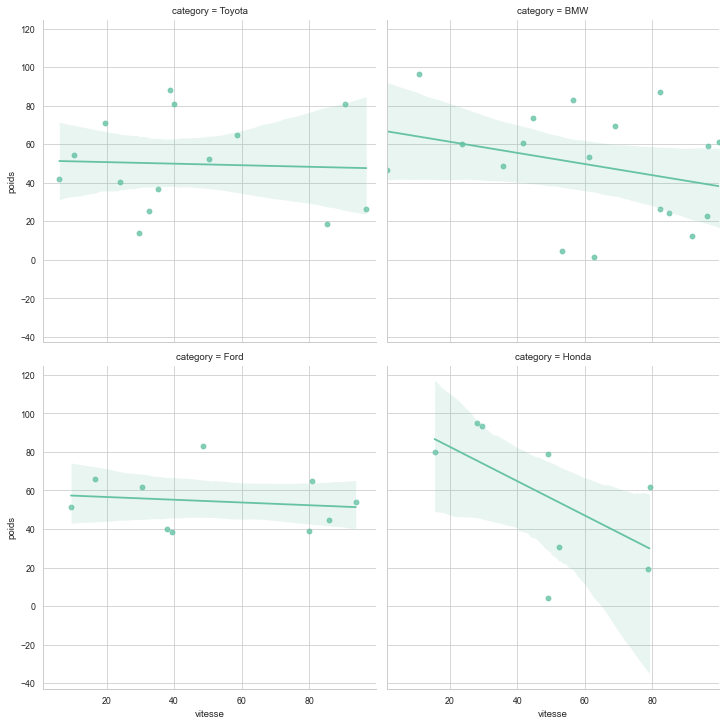

In [30]:
sns.lmplot(x='vitesse', y='poids', col="category", col_wrap=2,data=df)

# JOINPLOT - Distribution & Relation

Distribution et relation entre deux variables quantitatives.

seaborn.jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)

http://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

### Exemple 1

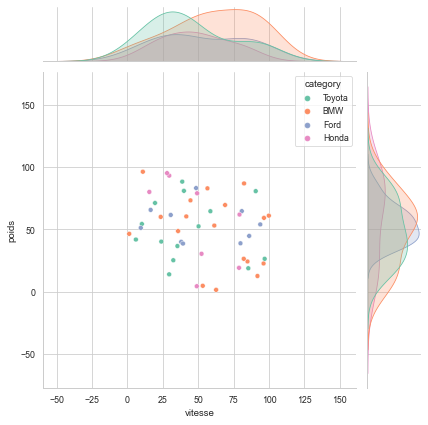

In [31]:
sns.jointplot(data=df, x="vitesse", y="poids", hue='category')

### Exemple 2

    kind= reg - hex - hist - kde

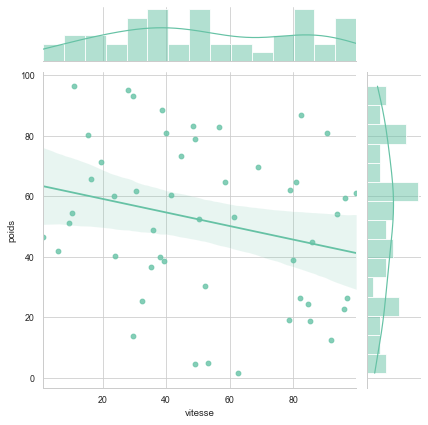

In [32]:
sns.jointplot(data=df, x="vitesse", y="poids", kind="reg", marginal_kws=dict(bins=15))

# HEATMAP - Multi-Relation

seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Exemple 1

<AxesSubplot:>

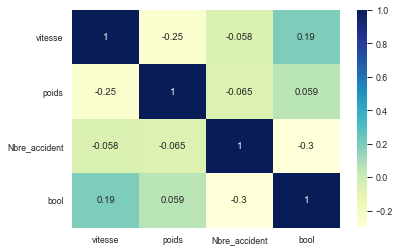

In [33]:
sns.heatmap(df.corr()
           ,annot=True
           ,cmap='YlGnBu')

# PAIRPLOT - Multi-Relation

Relation entre plusieurs variables

seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

### Exemple 1

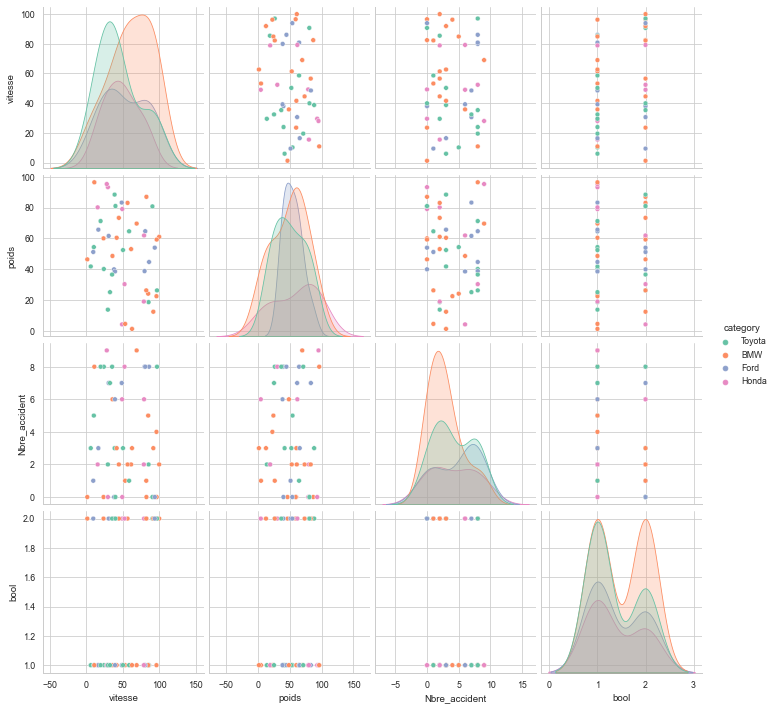

In [34]:
sns.pairplot(df
            , hue="category"
            #, diag_kind="hist" # histo
            #, corner=True # triangle
            )

# Facetgrid Multi-graph

sns.FacetGrid(self, data, *, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=False, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

### Exemple 1

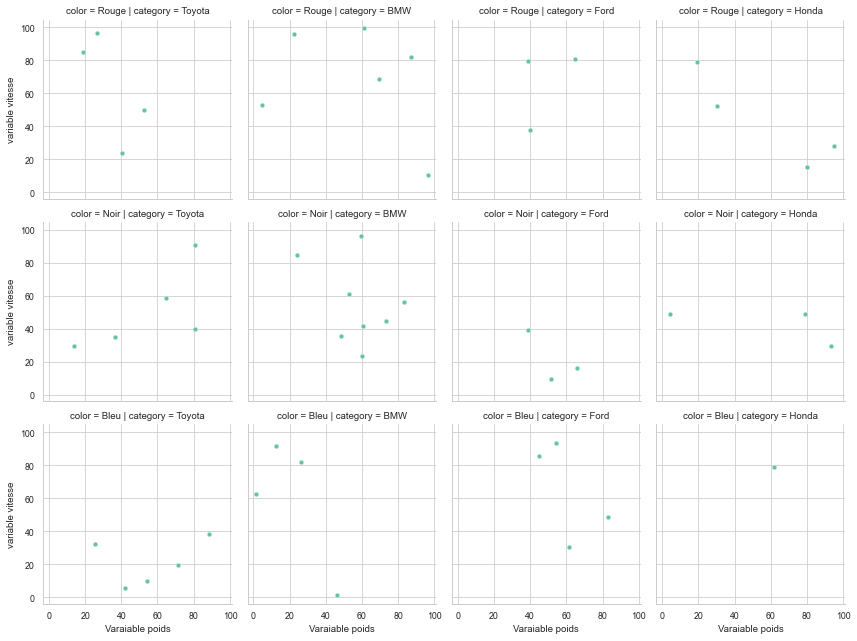

In [35]:
g=sns.FacetGrid(df, col="category", row="color")
g.map_dataframe(sns.scatterplot, "poids", "vitesse")
g.set_axis_labels("Varaiable poids", "variable vitesse")

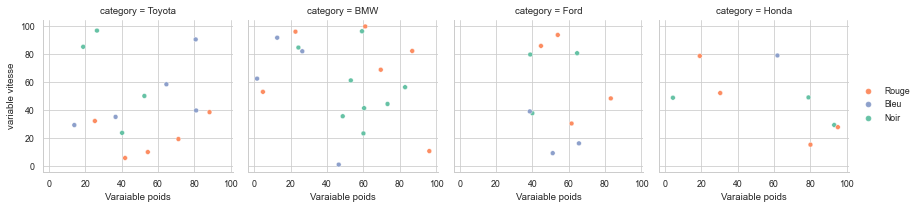

In [36]:
g=sns.FacetGrid(df, col="category")
g.map_dataframe(sns.scatterplot, "poids", "vitesse", hue="color")
g.set_axis_labels("Varaiable poids", "variable vitesse")
g.add_legend()

# JoinGrid Multi-graph

sns.JointGrid(self, *, x=None, y=None, data=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, size=None, marginal_ticks=False, hue=None, palette=None, hue_order=None, hue_norm=None)

https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid



## Exemple 1

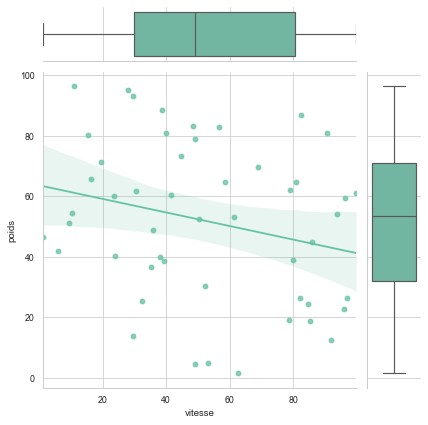

In [37]:
g = sns.JointGrid(data=df, x="vitesse", y="poids")
g.plot(sns.regplot, sns.boxplot)

## Exemple 2

<AxesSubplot:xlabel='Density', ylabel='poids'>

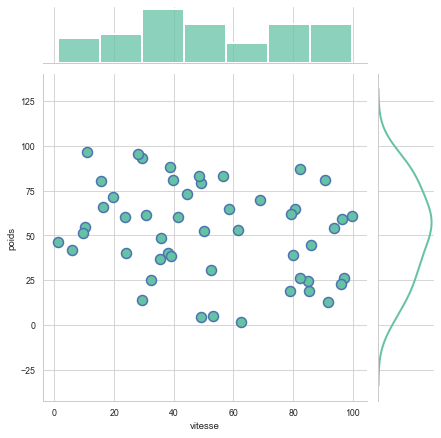

In [38]:
g=sns.JointGrid()
x, y = df["vitesse"], df["poids"]
sns.scatterplot(x=x, y=y, ec="b", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)

# Combo Plot

In [39]:
# CREATION DATAFRAME
# Mois
mois = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
         'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Moyenne temperatures
moy_Temp = [35, 45, 55, 65, 75, 85, 95, 100, 85, 65, 45, 35]
# Moyenne de  percipitation %
moy_Percipitation_Perc = [.90, .75, .55, .10, .35, .05, .05, .08, .20, .45, .65, .80]

df = pd.DataFrame({'Mois': mois, 
                   'Moy_Temp': moy_Temp, 
                   'Moy_Percipitation_Perc': moy_Percipitation_Perc})


df.head()

,Mois,Moy_Temp,Moy_Percipitation_Perc
0,Jan,35,0.90
1,Feb,45,0.75
2,Mar,55,0.55
3,Apr,65,0.10
4,May,75,0.35


Text(0.5, 1.0, 'Moyenne des temperature par mois')

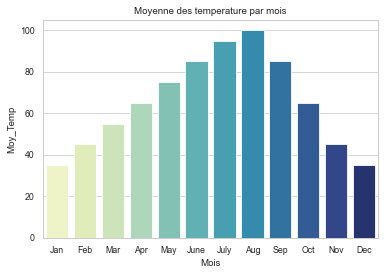

In [40]:
# Plot 1
sns.barplot(x='Mois', y='Moy_Temp', data=df, palette='YlGnBu')
plt.title('Moyenne des temperature par mois')

<AxesSubplot:title={'center':'Moyenne des précipitations par mois'}, xlabel='Mois', ylabel='Moy_Percipitation_Perc'>

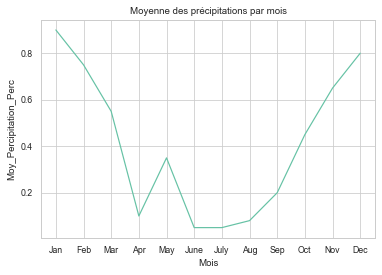

In [41]:
# Plot 2
plt.title('Moyenne des précipitations par mois')
sns.lineplot(x='Mois', y='Moy_Percipitation_Perc', data=df, sort=False)

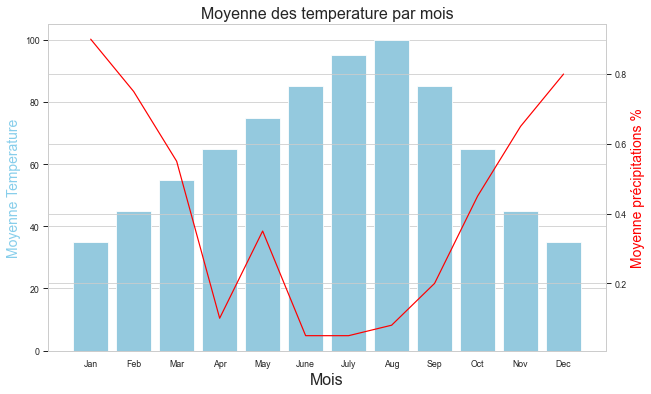

In [42]:
# Combo plot
# Figure
fig, ax1 = plt.subplots(figsize=(10,6))


# creation bar plot 
ax1.set_title('Moyenne des temperature par mois', fontsize=16)
ax1 = sns.barplot(x='Mois', y='Moy_Temp', data = df, color="skyblue")
ax1.set_xlabel('Mois', fontsize=16)
ax1.set_ylabel('Moyenne Temperature', color="skyblue" ,fontsize=14)


# Partage de l'axe x
ax2 = ax1.twinx()



# creation line plot 
ax2.set_ylabel('Moyenne précipitations %', color="red", fontsize=14)
ax2 = sns.lineplot(x='Mois', y='Moy_Percipitation_Perc', data = df, sort=False, color="red")


#show plot
plt.show()

Resource suppl.: https://moncoachdata.com/blog/guide-visualisations-de-donnees-python/